In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
sns.set()

## EDA on training file

In [4]:
# train_data = pd.read_csv('//Users//bagades//Desktop//RS//serendipity-sac2018//training.csv')
train_data = pd.read_csv('../Data/serendipity-sac2018/training.csv')

In [5]:
train_data.head()

,userId,movieId,rating,timestamp
0,142882,91658,2.5,1515209647000
1,142882,4344,1.0,1515209646000
2,142882,45720,2.0,1515209643000
3,142882,4734,2.0,1515209641000
4,142882,91542,2.0,1515209637000


In [6]:
print('The dataset train has {:,} rows and {:,} columns'.format(train_data.shape[0],train_data.shape[1]))

The dataset train has 9,997,850 rows and 4 columns


In [7]:
print('Number of unqiue userIDs are {:,} and number of movies are {:,}'.format(len(train_data['userId'].unique()),
                                                                     len(train_data['movieId'].unique())))

Number of unqiue userIDs are 104,661 and number of movies are 49,151


In [8]:
from datetime import datetime
train_data['timestamp'] = train_data['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))

In [9]:
train_data['year'] = train_data['timestamp'].apply(lambda x: x.year)
train_data['month'] = train_data['timestamp'].apply(lambda x: x.month)

In [10]:
train_data['weekday'] = train_data['timestamp'].apply(lambda x: x.weekday())

In [11]:
#train_data['weekday']

In [12]:
train_data['year'].value_counts()

2016    2099107
2017    1993188
2015    1924640
2010     982511
2011     836873
2012     795184
2013     635510
2014     589026
2009     116459
2018      25352
Name: year, dtype: int64

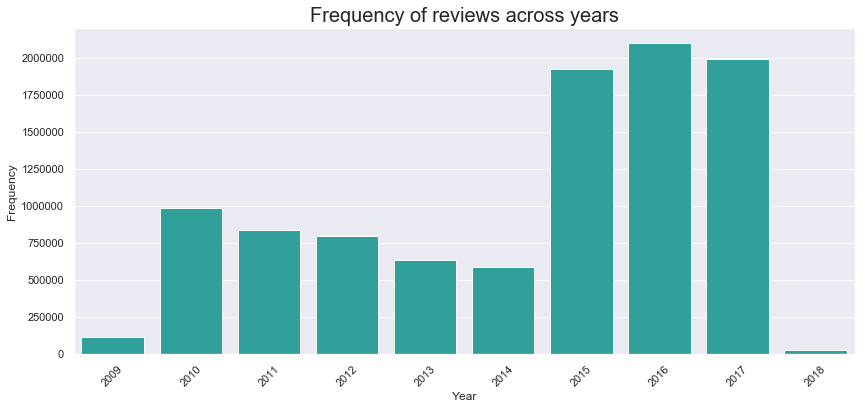

In [13]:
plt.rcParams['figure.figsize'] = (14, 6)
sns.countplot(train_data['year'], color = 'lightseagreen')
plt.title('Frequency of reviews across years', fontdict= {'fontsize': 20})
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks( rotation = 45)
plt.show()

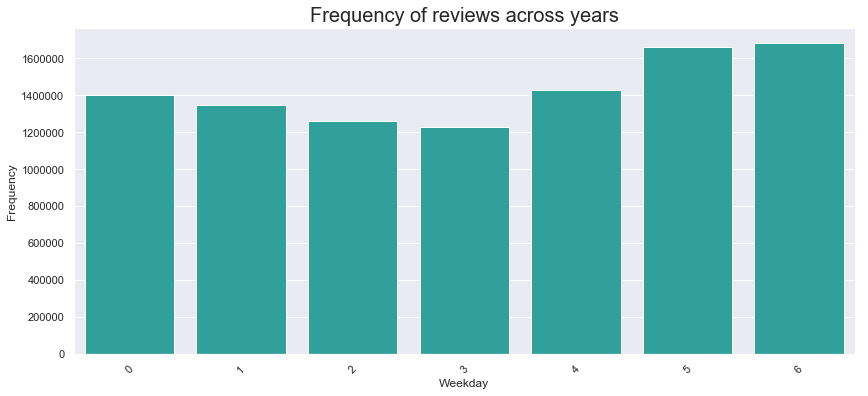

In [14]:
#week_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.rcParams['figure.figsize'] = (14, 6)
sns.countplot(train_data['weekday'], color = 'lightseagreen')
plt.title('Frequency of reviews across years', fontdict= {'fontsize': 20})
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
# plt.xticks(labels = week_labels)
plt.show()

In [15]:
# Movie with maximum review
train_data['movieId'].value_counts().head(20)

2571     42120
318      40889
79132    37947
58559    34531
2959     34290
356      33854
7153     32509
4993     31634
260      29141
296      29140
5952     28750
593      27093
527      25193
1196     24349
858      24032
1198     24012
72998    23483
68954    23131
60069    21776
50       21273
Name: movieId, dtype: int64

**Creating a user movie matrix**

In [16]:
UM_matrix = train_data.pivot(index='userId', columns='movieId', values='rating')

In [17]:
total_nas = UM_matrix.isna().sum().sum()

KeyboardInterrupt: 

In [ ]:
nas_per_movie = UM_matrix.isna().sum(axis = 0)
nas_per_user = UM_matrix.isna().sum(axis = 1)

In [ ]:
print('{:,} which is {}% NAs'.format(total_nas,round(total_nas/(len(nas_per_user)*len(nas_per_movie)),4)) )

In [109]:
nas_per_movie*100/len(nas_per_user)

movieId
1         80.254345
2         93.674817
3         99.023514
4         99.874834
5         97.880777
6         95.141457
7         99.062688
8         99.886300
9         99.741069
10        95.775886
11        98.735919
12        99.292955
13        99.398057
14        99.602526
15        99.721004
16        95.755821
17        97.499546
18        98.648971
19        95.342105
20        99.454429
21        98.211368
22        99.184988
23        99.320664
24        98.780826
25        98.109133
26        99.783109
27        99.742980
28        99.543287
29        97.597004
30        99.946494
            ...    
183265    99.999045
183267    99.999045
183271    99.999045
183273    99.999045
183275    99.999045
183277    99.999045
183281    99.998089
183283    99.998089
183285    99.998089
183287    99.999045
183289    99.998089
183291    99.999045
183293    99.999045
183295    99.996178
183299    99.999045
183301    99.999045
183303    99.999045
183305    99.999045
183307    99

In [30]:
nas_per_user*100/ len(nas_per_movie)

userId
100000    99.987793
100001    99.798580
100002    99.784338
100003    99.995931
100004    99.609367
100005    99.959309
100006    99.985758
100007    99.987793
100008    99.989827
100009    99.985758
100010    99.924722
100011    99.792476
100012    99.806718
100013    99.991862
100014    99.965413
100015    99.867754
100016    99.794511
100017    99.979655
100018    99.694818
100019    99.961344
100020    99.749751
100021    99.619540
100022    99.965413
100023    99.770096
100024    99.532054
100025    99.967447
100026    99.936929
100027    99.945067
100028    99.940998
100029    99.820960
            ...    
206956    99.837236
206957    99.761958
206958    99.892169
206959    99.977620
206960    99.776200
206961    99.951171
206962    99.965413
206963    99.940998
206964    99.985758
206965    99.847409
206966    99.871824
206967    97.739619
206968    99.780269
206969    99.991862
206970    99.969482
206971    99.692783
206972    99.855547
206973    99.963378
206974    99.

## EDA on tags file

In [31]:
tags_data = pd.read_csv('//Users//bagades//Desktop//RS//serendipity-sac2018//tags.csv')

In [32]:
tags_data.head()

,userId,movieId,tag,timestamp
0,144473,933,hw classics,1169455118000
1,144473,933,alfred hitchcock,1169455125000
2,144473,49272,guilty pleasure,1169457148000
3,144473,8228,not available from netflix,1169457152000
4,144473,7925,in netflix queue,1169457154000


In [41]:
tags_data.shape

(628157, 4)

In [34]:
print('Number of unqiue userIDs are {:,} and number of movies are {:,}'.format(len(tags_data['userId'].unique()),
                                                                     len(tags_data['movieId'].unique())))

Number of unqiue userIDs are 8,908 and number of movies are 20,368


In [37]:
print('We have {:,} tags only for {}% of the total movies'.format(len(tags_data['movieId'].unique()),
                    round(len(tags_data['movieId'].unique())*100/len(train_data['movieId'].unique()),4)))

We have 20,368 tags only for 41.4396% of the total movies


In [39]:
len(tags_data['tag'].unique())

45198

In [43]:
tags_data['tag'].value_counts().head(20)

comedy                   4930
based on a book          4906
erlend's dvds            4598
action                   4537
sci-fi                   4441
tumey's dvds             4024
nudity (topless)         3132
classic                  3113
betamax                  2998
bd-r                     2958
romance                  2885
fantasy                  2813
movie to see             2759
seen more than once      2754
twist ending             2565
dvd-video                2538
owned                    2526
dvd                      2423
less than 300 ratings    2384
surreal                  2303
Name: tag, dtype: int64

In [44]:
tags_data['movieId'].value_counts().head(20)

296      1821
2959     1631
318      1571
2571     1507
356      1454
58559    1217
260      1154
4226     1122
44191    1110
858      1071
50        987
593       977
4878      975
48394     965
7153      948
7361      932
541       911
32587     897
2858      893
5618      883
Name: movieId, dtype: int64

## EDA on movies file

In [56]:
movies = pd.read_csv('//Users//bagades//Desktop//RS//serendipity-sac2018//movies.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [79]:
movies.head()

,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,Toy Story (1995),11/19/95,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",114709,862.0,Adventure,Animation,Children,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN
1,2,Jumanji (1995),12/15/95,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",113497,8844.0,Adventure,Children,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),1/1/95,Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",113228,15602.0,Comedy,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),1/15/96,Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",114885,31357.0,Comedy,Drama,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),12/8/95,Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",113041,11862.0,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
movies['genres_cleaned'] = movies.iloc[:,7:-1].fillna('').apply(lambda x: x.str.cat(sep=';'), axis=1)

In [103]:
movies['genres_cleaned'] = movies['genres_cleaned'].apply(lambda x: set(x.split(';')) - set({''}))

In [104]:
movies_cleaned = movies[movies.columns[movies.columns.str.contains('Unnamed') != True]]

In [105]:
movies_cleaned.head()

,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres,genres_cleaned
0,1,Toy Story (1995),11/19/95,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",114709,862.0,Adventure,"{Animation, Fantasy, Adventure, Children, Comedy}"
1,2,Jumanji (1995),12/15/95,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",113497,8844.0,Adventure,"{Adventure, Children, Fantasy}"
2,3,Grumpier Old Men (1995),1/1/95,Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",113228,15602.0,Comedy,"{Comedy, Romance}"
3,4,Waiting to Exhale (1995),1/15/96,Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",114885,31357.0,Comedy,"{Comedy, Drama, Romance}"
4,5,Father of the Bride Part II (1995),12/8/95,Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",113041,11862.0,Comedy,{Comedy}


In [106]:
movies_cleaned = movies_cleaned.drop(columns= 'genres')

In [107]:
movies_cleaned.to_csv('//Users//bagades//Desktop//RS//serendipity-sac2018//movies_cleaned.csv')

## EDA on Answers.csv

In [38]:
answers = pd.read_csv("../../Data/serendipity-sac2018/answers.csv")

In [39]:
answers.head()

,userId,movieId,rating,timestamp,predictedRating,s1,s2,s3,s4,s5,...,s8,q,s_ser_rel,s_ser_find,s_ser_imp,s_ser_rec,m_ser_rel,m_ser_find,m_ser_imp,m_ser_rec
0,205229,108979,5.0,1486127833000,4.882299,1.0,1.0,3.0,4.0,2.0,...,5.0,6,False,False,False,False,False,False,False,False
1,205229,6947,4.0,1486121212000,3.253348,1.0,1.0,3.0,4.0,4.0,...,4.0,6,False,False,False,False,False,False,False,False
2,205229,117444,4.0,1486127837000,4.922837,1.0,4.0,4.0,2.0,2.0,...,2.0,3,False,False,False,False,False,False,False,False
3,205229,150548,4.0,1486127824000,4.428912,2.0,2.0,4.0,2.0,4.0,...,1.0,7,False,False,False,False,False,False,False,False
4,205229,136542,5.0,1486128075000,4.101256,1.0,1.0,5.0,1.0,1.0,...,2.0,6,False,False,False,False,False,False,False,False


In [40]:
answers['timestamp'] = answers['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))
answers['year'] = answers['timestamp'].apply(lambda x: x.year)
answers['month'] = answers['timestamp'].apply(lambda x: x.month)
answers['weekday'] = answers['timestamp'].apply(lambda x: x.weekday())

In [41]:
print('The dataset train has {:,} rows and {:,} columns'.format(answers.shape[0],answers.shape[1]))
print('Number of unqiue userIDs are {:,} and number of movies are {:,}'.format(len(answers['userId'].unique()),
                                                                     len(answers['movieId'].unique())))

The dataset train has 2,150 rows and 25 columns
Number of unqiue userIDs are 481 and number of movies are 1,678


In [42]:
answers.rating.describe()

count    2150.000000
mean        3.982791
std         0.488758
min         2.500000
25%         3.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

**Serendipity ratings are given for movies that were rated highly by users. Could be an issue.**

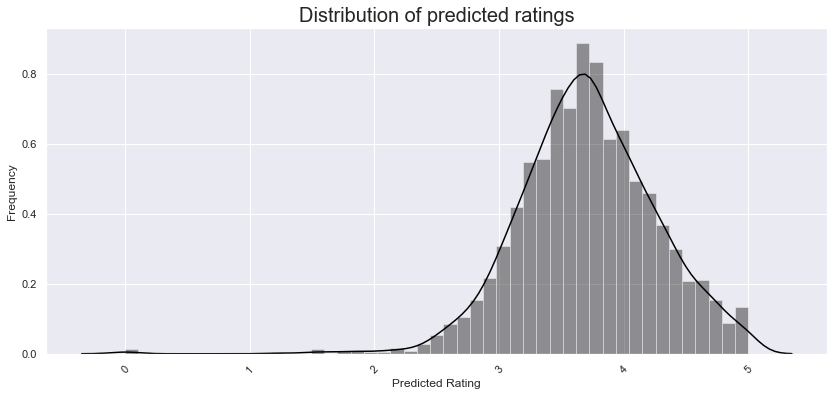

In [58]:
plt.rcParams['figure.figsize'] = (14, 6)
# sns.countplot(answers['rating'], color = 'lightseagreen')
sns.distplot(answers[answers['predictedRating'].isna() == False]['predictedRating'], color = 'black')
plt.title('Distribution of predicted ratings', fontdict= {'fontsize': 20})
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.xticks( rotation = 45)
plt.show()

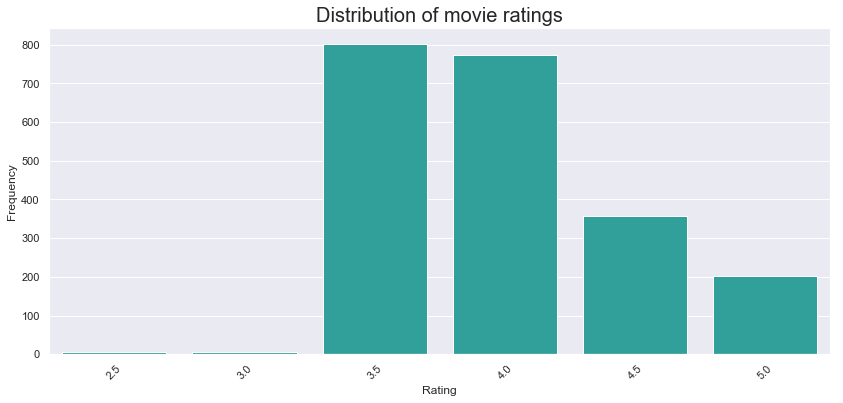

In [57]:
plt.rcParams['figure.figsize'] = (14, 6)
sns.countplot(answers['rating'], color = 'lightseagreen',)
plt.title('Distribution of movie ratings', fontdict= {'fontsize': 20})
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks( rotation = 45)
plt.show()

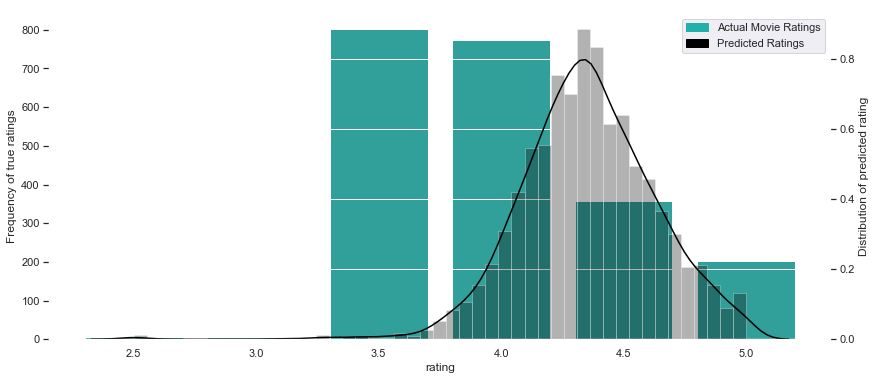

In [97]:
# plt.rcParams['figure.figsize'] = (14, 6)
import matplotlib.patches as mpatches
fig, ax = plt.subplots()
sns.countplot(answers['rating'], color = 'lightseagreen', ax=ax)
ax.set_ylabel("Frequency of true ratings")
ax.patch.set_alpha(0)
ax2 = ax.twinx()
sns.distplot(answers[answers['predictedRating'].isna() == False]['predictedRating'], 
             color = 'black',ax=ax2,hist_kws={"alpha": 0.3})
ax2.set_ylabel("Distribution of predicted rating")
act_patch = mpatches.Patch(color='lightseagreen', label='Actual Movie Ratings')
pred_patch = mpatches.Patch(color='black', label='Predicted Ratings')
plt.legend(handles=[act_patch,pred_patch])
plt.show()



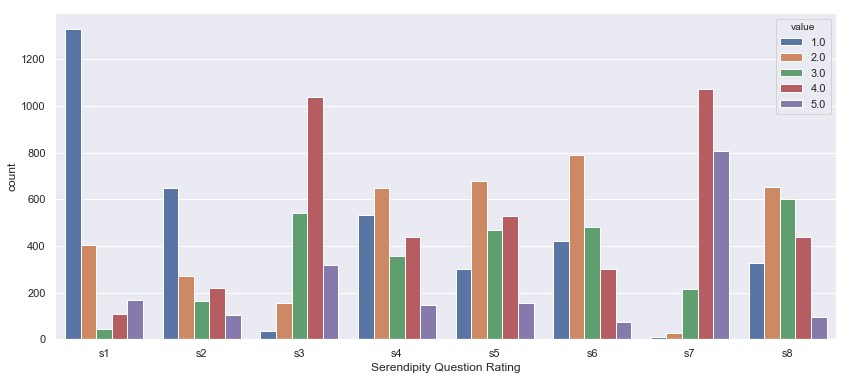

In [45]:
serendipity_cols = ["s"+str(i) for i in range(1,9)]

sns.countplot(x="variable", hue="value", data=pd.melt(answers[serendipity_cols]))
plt.xlabel('Serendipity Question Rating')
plt.show()

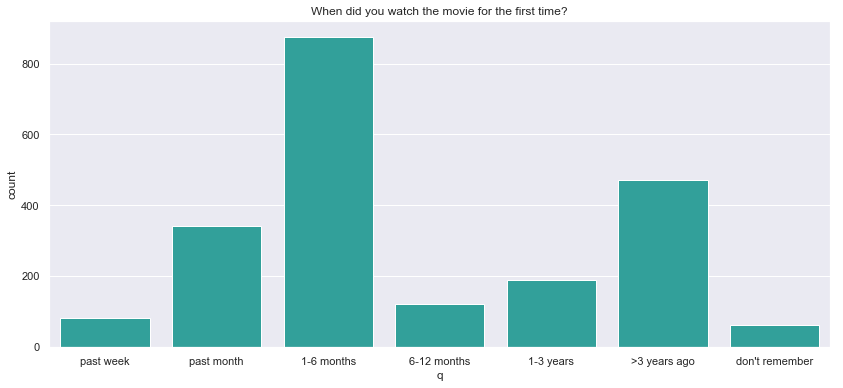

In [52]:
sns.countplot(answers['q'], color = 'lightseagreen')
plt.title('When did you watch the movie for the first time?')
plt.xticks([i for i in range(7)],
           ['past week', 'past month', '1-6 months', '6-12 months', '1-3 years', '>3 years ago', 'don\'t remember'])
plt.show()

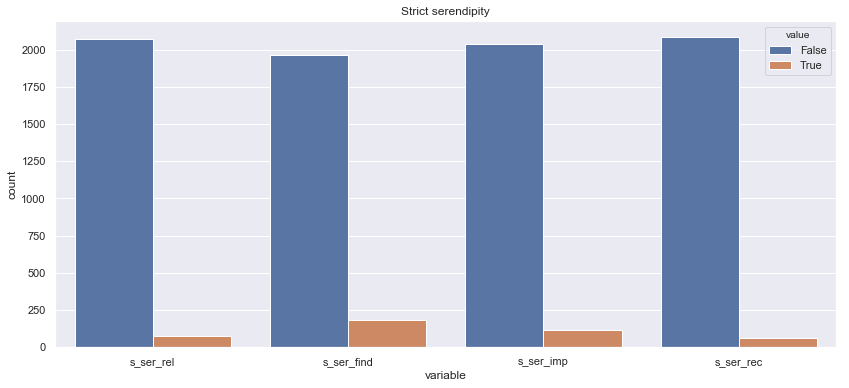

In [54]:
serendipity_cols = ['s_ser_rel', 's_ser_find', 's_ser_imp', 's_ser_rec']

sns.countplot(x="variable", hue="value", data=pd.melt(answers[serendipity_cols]))
plt.title('Strict serendipity')
plt.show()

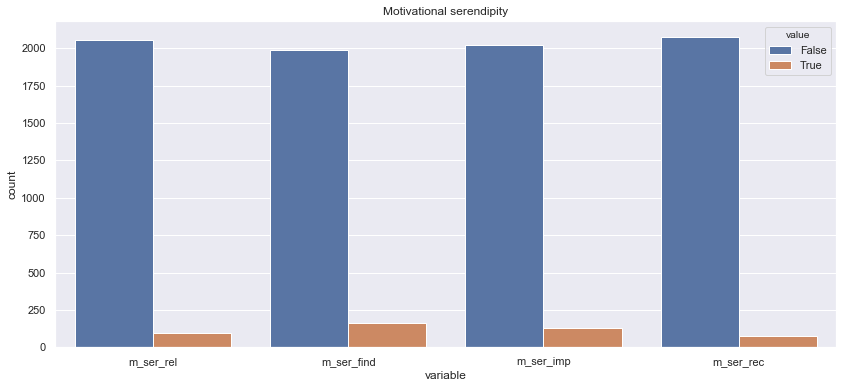

In [55]:
serendipity_cols = ['m_ser_rel', 'm_ser_find', 'm_ser_imp', 'm_ser_rec']

sns.countplot(x="variable", hue="value", data=pd.melt(answers[serendipity_cols]))
plt.title('Motivational serendipity')
plt.show()